# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA

# Load Data

In [2]:
# Load the data
file_path = "fic_epita_kantar_codes.csv"
data_codes = pd.read_csv(file_path, sep=';')

In [3]:
# Select relevant columns
columns_of_interest = [
    "A9_1_slice", "A9_2_slice", "A9_3_slice", "A9_4_slice", "A9_5_slice",
    "A9_6_slice", "A9_7_slice", "A9_8_slice", "A9_9_slice", "A9_10_slice",
    "A9_11_slice", "A9_12_slice", "A9_13_slice", "A9_14_slice", "A9_15_slice",
    "A9_16_slice", "A10_1_slice", "A10_2_slice", "A10_3_slice", "A10_4_slice",
    "A10_5_slice", "A10_6_slice", "A10_7_slice", "A10_8_slice",
    "A11_1_slice", "A11_2_slice", "A11_3_slice", "A11_4_slice", "A11_5_slice",
    "A11_6_slice", "A11_7_slice", "A11_8_slice", "A11_9_slice", "A11_10_slice",
    "A11_11_slice", "A11_12_slice", "A11_13_slice"
]
subset_data = data_codes[columns_of_interest]

In [40]:
# Check for missing values
missing_values = subset_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Data type analysis
data_types = subset_data.dtypes
print("\nData Types:\n", data_types)

# Summary statistics
summary_stats = subset_data.describe()
print("\nSummary Statistics:\n", summary_stats)

# Check for outliers
outliers = subset_data.apply(zscore).abs() > 3
print("\nOutliers:\n", outliers)

Missing Values:
 A11           0
A12           0
A13           0
A14           0
A4            0
A5            0
A5bis         0
A8_1_slice    0
A8_2_slice    0
A8_3_slice    0
A8_4_slice    0
B1_1_slice    0
B1_2_slice    0
B2_1_slice    0
B2_2_slice    0
B3            0
B4            0
B6            0
C1_1_slice    0
C1_2_slice    0
C1_3_slice    0
C1_4_slice    0
C1_5_slice    0
C1_6_slice    0
C1_7_slice    0
C1_8_slice    0
C1_9_slice    0
dtype: int64

Data Types:
 A11             int64
A12             int64
A13             int64
A14             int64
A4              int64
A5            float64
A5bis         float64
A8_1_slice      int64
A8_2_slice      int64
A8_3_slice      int64
A8_4_slice      int64
B1_1_slice      int64
B1_2_slice      int64
B2_1_slice      int64
B2_2_slice      int64
B3              int64
B4              int64
B6              int64
C1_1_slice      int64
C1_2_slice      int64
C1_3_slice      int64
C1_4_slice      int64
C1_5_slice      int64
C1_6_slice      in

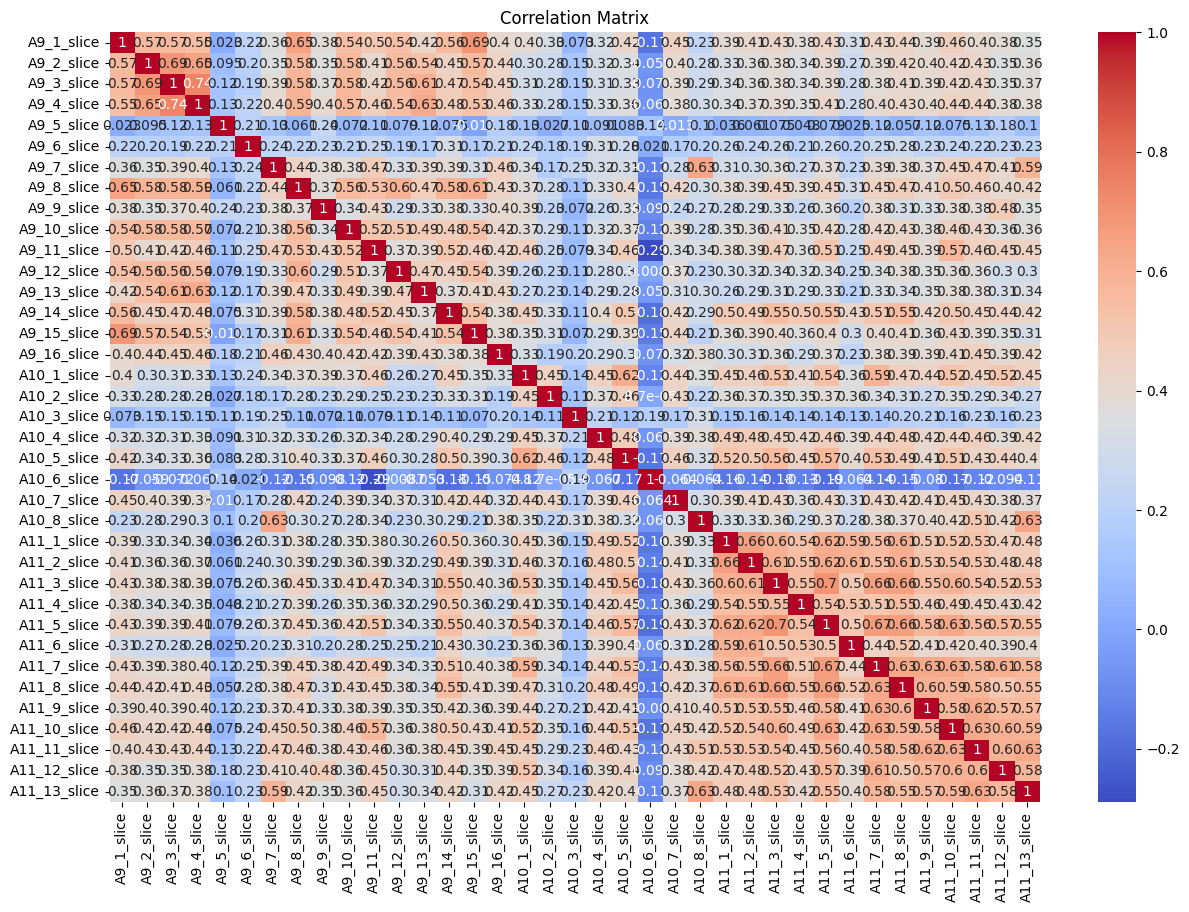

In [5]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(subset_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [6]:
# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data)

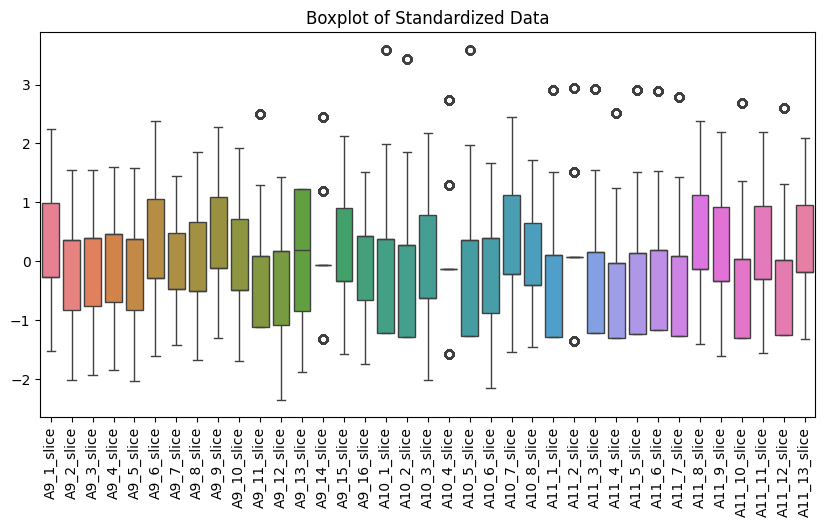

In [7]:
# Check if clustering is appropriate (variance and distribution)
plt.figure(figsize=(10, 5))
sns.boxplot(data=pd.DataFrame(scaled_data, columns=columns_of_interest))
plt.xticks(rotation=90)
plt.title("Boxplot of Standardized Data")
plt.show()

# Clustering

In [8]:
# Function to evaluate clustering
def evaluate_clustering(labels, data):
    if len(set(labels)) > 1:  # At least 2 clusters
        silhouette = silhouette_score(data, labels)
        davies_bouldin = davies_bouldin_score(data, labels)
        calinski_harabasz = calinski_harabasz_score(data, labels)
    else:
        silhouette, davies_bouldin, calinski_harabasz = None, None, None
    return silhouette, davies_bouldin, calinski_harabasz

results = {}

## Kmeans

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

results['K-Means'] = evaluate_clustering(kmeans_labels, scaled_data)

## Hierarchical Clustering

In [10]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(scaled_data)

results['Agglomerative'] = evaluate_clustering(agglo_labels, scaled_data)

## DBSCAN

In [11]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

results['DBSCAN'] = evaluate_clustering(dbscan_labels, scaled_data)

## Gaussian Mixture Model

In [12]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

results['GMM'] = evaluate_clustering(gmm_labels, scaled_data)

## Spectral Clustering

In [13]:
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(scaled_data)

results['Spectral'] = evaluate_clustering(spectral_labels, scaled_data)

## Results

In [14]:
# Display results
print("Clustering Results (Silhouette, Davies-Bouldin, Calinski-Harabasz):")
for method, scores in results.items():
    print(f"{method}: {scores}")

Clustering Results (Silhouette, Davies-Bouldin, Calinski-Harabasz):
K-Means: (0.15000104165982003, 1.9324657792049413, 1180.8852559370334)
Agglomerative: (0.14339834123015854, 1.8395245674796776, 996.5364387363684)
DBSCAN: (-0.2621287347122678, 1.4345239237547471, 48.04156410303799)
GMM: (0.10413880814721477, 2.37651425086014, 641.0975873312955)
Spectral: (0.17701950560835913, 1.3564446912416523, 768.6981741935361)


In [15]:
# Plotting the results
methods = list(results.keys())
silhouette_scores = [results[method][0] for method in methods]
davies_bouldin_scores = [results[method][1] for method in methods]
calinski_harabasz_scores = [results[method][2] for method in methods]

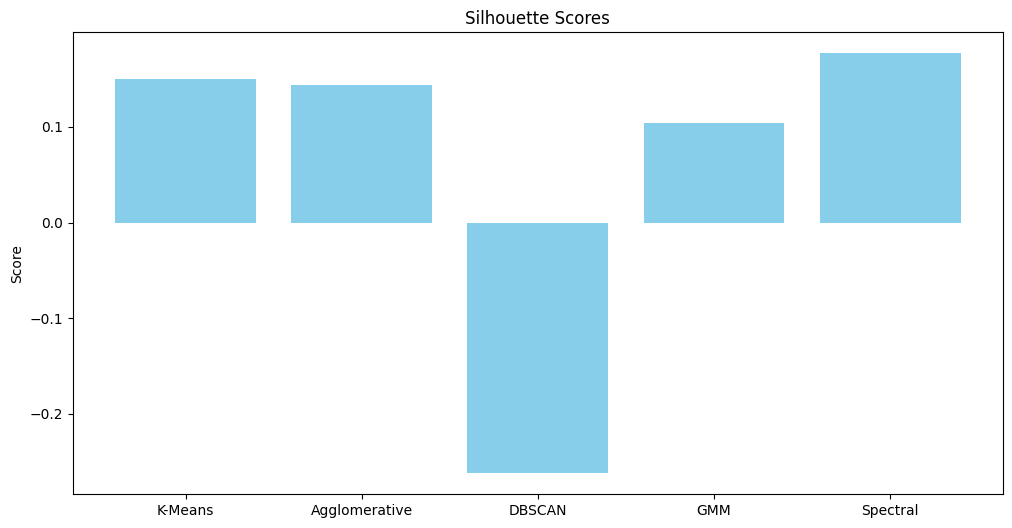

In [16]:
# Bar plot for silhouette scores
plt.figure(figsize=(12, 6))
plt.bar(methods, silhouette_scores, color='skyblue')
plt.title('Silhouette Scores')
plt.ylabel('Score')
plt.show()

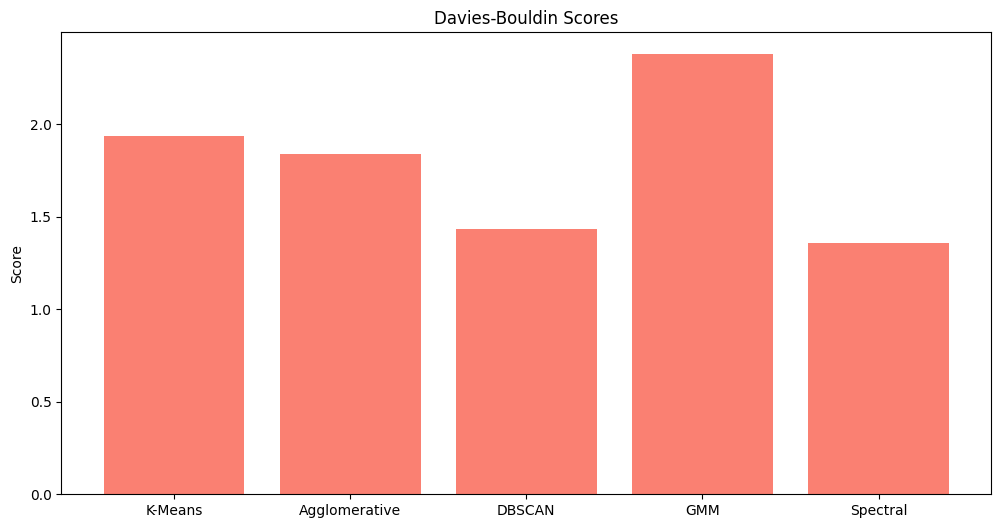

In [17]:
# Bar plot for Davies-Bouldin scores
plt.figure(figsize=(12, 6))
plt.bar(methods, davies_bouldin_scores, color='salmon')
plt.title('Davies-Bouldin Scores')
plt.ylabel('Score')
plt.show()

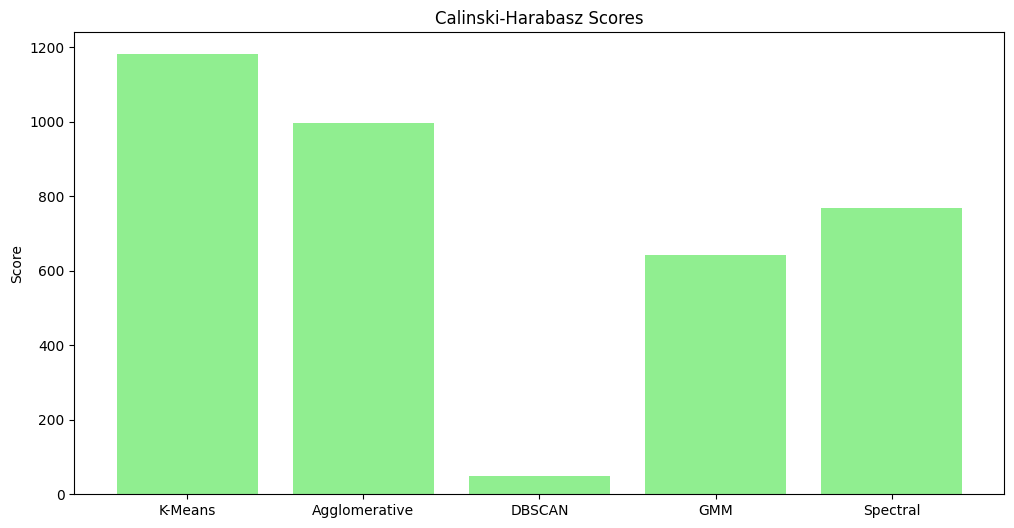

In [18]:
# Bar plot for Calinski-Harabasz scores
plt.figure(figsize=(12, 6))
plt.bar(methods, calinski_harabasz_scores, color='lightgreen')
plt.title('Calinski-Harabasz Scores')
plt.ylabel('Score')
plt.show()

In [19]:
# Analysis
def analyze_results(results):
    print("Analysis:")
    best_silhouette = max(silhouette_scores)
    best_davies_bouldin = min(davies_bouldin_scores)
    best_calinski_harabasz = max(calinski_harabasz_scores)

    print(f"Best Silhouette Score: {best_silhouette} ({methods[silhouette_scores.index(best_silhouette)]})")
    print(f"Best Davies-Bouldin Score: {best_davies_bouldin} ({methods[davies_bouldin_scores.index(best_davies_bouldin)]})")
    print(f"Best Calinski-Harabasz Score: {best_calinski_harabasz} ({methods[calinski_harabasz_scores.index(best_calinski_harabasz)]})")

analyze_results(results)

Analysis:
Best Silhouette Score: 0.17701950560835913 (Spectral)
Best Davies-Bouldin Score: 1.3564446912416523 (Spectral)
Best Calinski-Harabasz Score: 1180.8852559370334 (K-Means)


## Improving Spectral Clustering

In [20]:
pca = PCA(n_components=10, random_state=42)
reduced_data = pca.fit_transform(scaled_data)

In [21]:
# Experiment with different affinity matrices and n_clusters
def spectral_clustering_experiment(data, affinity, n_clusters=3, neighbors=10):
    if affinity == 'nearest_neighbors':
        connectivity = kneighbors_graph(data, n_neighbors=neighbors, include_self=False)
        clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
        labels = clustering.fit_predict(connectivity.toarray())
    elif affinity == 'precomputed':
        connectivity = kneighbors_graph(data, n_neighbors=neighbors, include_self=False)
        clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
        labels = clustering.fit_predict(connectivity.toarray())
    else:
        clustering = SpectralClustering(n_clusters=n_clusters, affinity=affinity, random_state=42)
        labels = clustering.fit_predict(data)
    return labels


In [22]:
# Test different configurations
results = {}
affinities = ['rbf', 'nearest_neighbors', 'precomputed']
n_clusters_list = [3, 4, 5, 6]

for affinity in affinities:
    for n_clusters in n_clusters_list:
        if affinity == 'nearest_neighbors':
            for neighbors in [5, 10, 20]:
                labels = spectral_clustering_experiment(reduced_data, affinity, n_clusters=n_clusters, neighbors=neighbors)
                results[f"{affinity}_neighbors_{neighbors}_clusters_{n_clusters}"] = evaluate_clustering(labels, reduced_data)
        elif affinity == 'precomputed':
            for neighbors in [5, 10, 20]:
                labels = spectral_clustering_experiment(reduced_data, affinity, n_clusters=n_clusters, neighbors=neighbors)
                results[f"{affinity}_precomputed_{neighbors}_clusters_{n_clusters}"] = evaluate_clustering(labels, reduced_data)
        else:
            labels = spectral_clustering_experiment(reduced_data, affinity, n_clusters=n_clusters)
            results[f"{affinity}_clusters_{n_clusters}"] = evaluate_clustering(labels, reduced_data)


/home/floflo/Documents/epita/epita-ml-scia/lib/python3.12/site-packages/sklearn/cluster/_spectral.py:702: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/home/floflo/Documents/epita/epita-ml-scia/lib/python3.12/site-packages/sklearn/cluster/_spectral.py:702: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/home/floflo/Documents/epita/epita-ml-scia/lib/python3.12/site-packages/sklearn/cluster/_spectral.py:702: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/home/floflo/Documents/epita/epita-ml-scia/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWar

In [23]:
# Display results
print("Spectral Clustering Results (Silhouette, Davies-Bouldin, Calinski-Harabasz):")
for method, scores in results.items():
    print(f"{method}: {scores}")

Spectral Clustering Results (Silhouette, Davies-Bouldin, Calinski-Harabasz):
rbf_clusters_3: (0.328112771232899, 0.7005149142696955, 190.23423509288148)
rbf_clusters_4: (0.2771161432447697, 0.6864421741201507, 129.58980059214738)
rbf_clusters_5: (0.25741806333849837, 0.6643309815074829, 98.21263666159591)
rbf_clusters_6: (0.25459949434116974, 0.6494412608474925, 81.00561319133038)
nearest_neighbors_neighbors_5_clusters_3: (0.2651067138465329, 0.5214947921665457, 217.12798759450706)
nearest_neighbors_neighbors_10_clusters_3: (-0.20250979282804235, 1.2967173393003542, 86.02491159759428)
nearest_neighbors_neighbors_20_clusters_3: (-0.21196725043174688, 1.2819932025226768, 87.88972582455794)
nearest_neighbors_neighbors_5_clusters_4: (-0.20612187978919916, 1.0719864804699215, 147.83049992610646)
nearest_neighbors_neighbors_10_clusters_4: (-0.20418297501830912, 1.0975376957172889, 161.08471691063366)
nearest_neighbors_neighbors_20_clusters_4: (-0.18013644579109936, 1.1659375508679515, 379.78

In [24]:
# Plotting the results
methods = list(results.keys())
silhouette_scores = [results[method][0] for method in methods]
davies_bouldin_scores = [results[method][1] for method in methods]
calinski_harabasz_scores = [results[method][2] for method in methods]

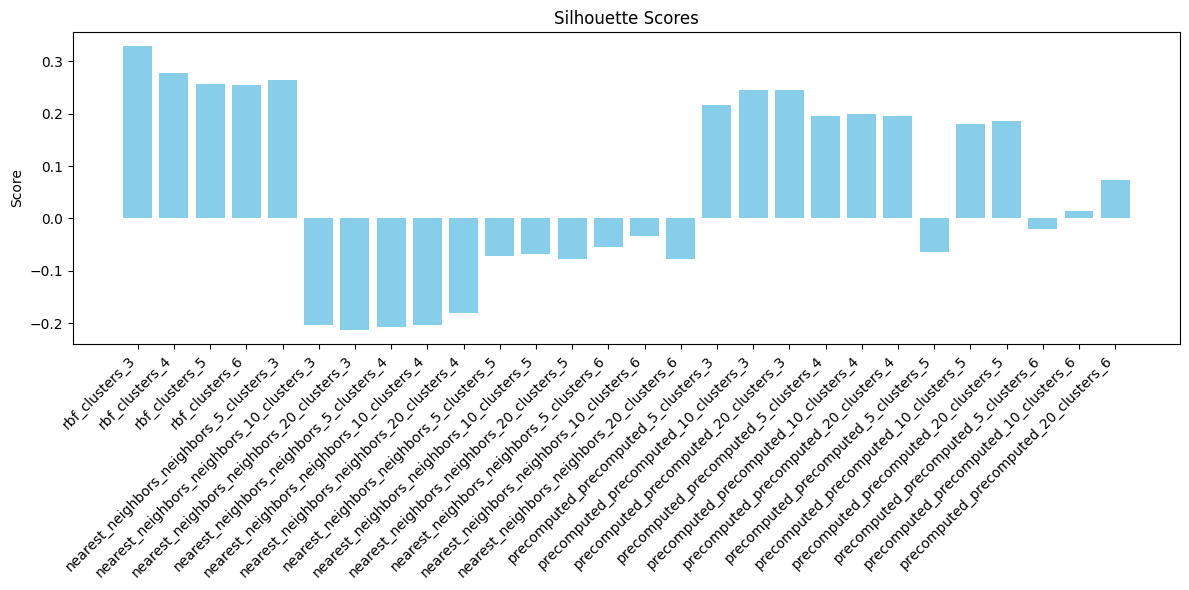

In [25]:
# Bar plot for silhouette scores
plt.figure(figsize=(12, 6))
plt.bar(methods, silhouette_scores, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Silhouette Scores')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

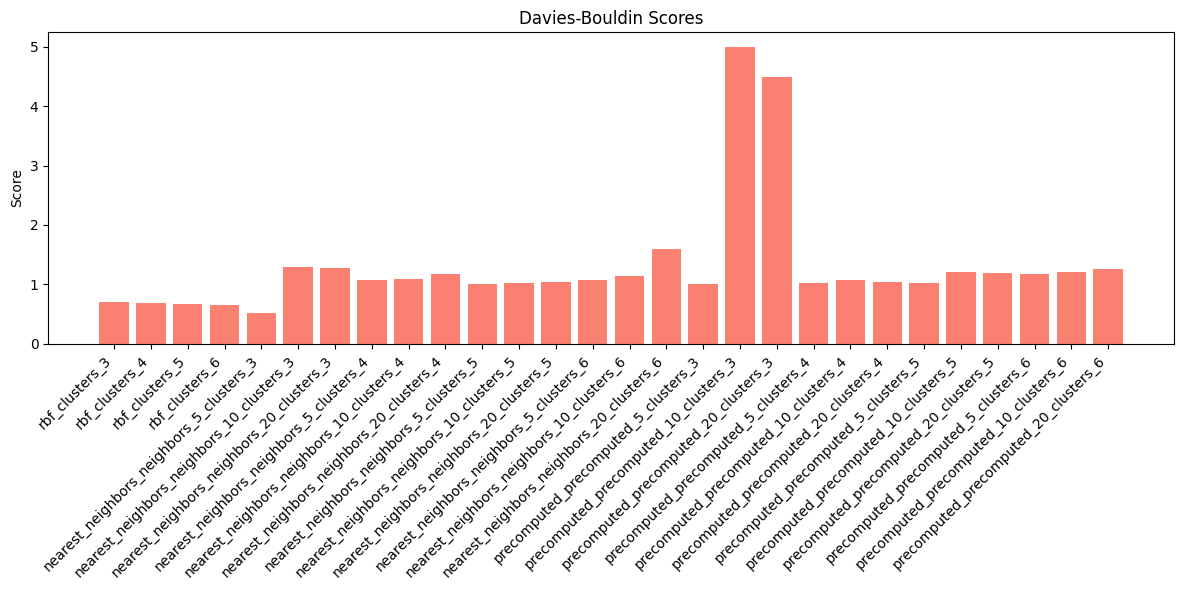

In [26]:
# Bar plot for Davies-Bouldin scores
plt.figure(figsize=(12, 6))
plt.bar(methods, davies_bouldin_scores, color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title('Davies-Bouldin Scores')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

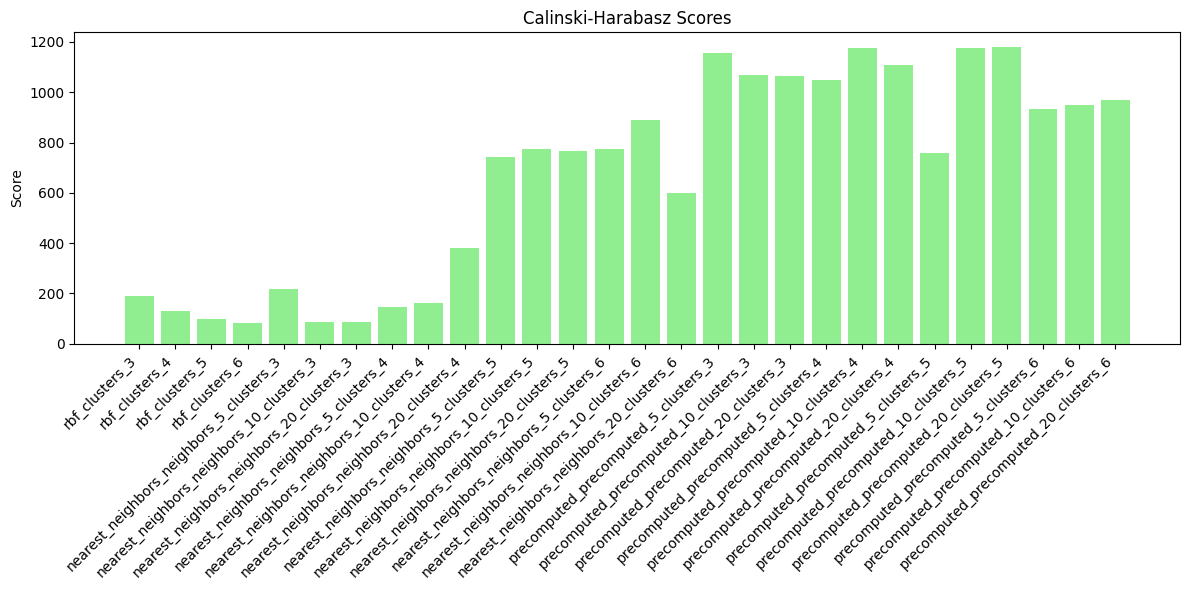

In [27]:
# Bar plot for Calinski-Harabasz scores
plt.figure(figsize=(12, 6))
plt.bar(methods, calinski_harabasz_scores, color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Calinski-Harabasz Scores')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

In [28]:
analyze_results(results)

Analysis:
Best Silhouette Score: 0.328112771232899 (rbf_clusters_3)
Best Davies-Bouldin Score: 0.5214947921665457 (nearest_neighbors_neighbors_5_clusters_3)
Best Calinski-Harabasz Score: 1179.1813025798926 (precomputed_precomputed_20_clusters_5)


# Clusterisation 2

In [29]:
# Select relevant columns
columns_of_interest = [
    "A11", "A12", "A13", "A14", "A4", "A5", "A5bis",
    "A8_1_slice", "A8_2_slice", "A8_3_slice", "A8_4_slice",
    "B1_1_slice", "B1_2_slice", "B2_1_slice", "B2_2_slice",
    "B3", "B4", "B6",
    "C1_1_slice", "C1_2_slice", "C1_3_slice", "C1_4_slice",
    "C1_5_slice", "C1_6_slice", "C1_7_slice", "C1_8_slice", "C1_9_slice"
]
subset_data = data_codes[columns_of_interest]

In [38]:
# Check for missing values
missing_values = subset_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Data type analysis
data_types = subset_data.dtypes
print("\nData Types:\n", data_types)

# Summary statistics
summary_stats = subset_data.describe()
print("\nSummary Statistics:\n", summary_stats)

# Check for outliers
outliers = subset_data.apply(zscore).abs() > 3
print("\nOutliers:\n", outliers)

Missing Values:
 A11              0
A12              0
A13              0
A14              0
A4               0
A5            1443
A5bis         3557
A8_1_slice       0
A8_2_slice       0
A8_3_slice       0
A8_4_slice       0
B1_1_slice       0
B1_2_slice       0
B2_1_slice       0
B2_2_slice       0
B3               0
B4               0
B6               0
C1_1_slice       0
C1_2_slice       0
C1_3_slice       0
C1_4_slice       0
C1_5_slice       0
C1_6_slice       0
C1_7_slice       0
C1_8_slice       0
C1_9_slice       0
dtype: int64

Data Types:
 A11             int64
A12             int64
A13             int64
A14             int64
A4              int64
A5            float64
A5bis         float64
A8_1_slice      int64
A8_2_slice      int64
A8_3_slice      int64
A8_4_slice      int64
B1_1_slice      int64
B1_2_slice      int64
B2_1_slice      int64
B2_2_slice      int64
B3              int64
B4              int64
B6              int64
C1_1_slice      int64
C1_2_slice      int64
C1_

In [41]:
# Handle NaN values in columns A5 and A5bis
subset_data['A5'].fillna(subset_data['A5'].mean(), inplace=True)
subset_data['A5bis'].fillna(subset_data['A5bis'].mean(), inplace=True)

/tmp/ipykernel_74334/3626455305.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  subset_data['A5'].fillna(subset_data['A5'].mean(), inplace=True)
/tmp/ipykernel_74334/3626455305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['A5'].fillna(subset_data['A5'].mean(), inplace=True)
/tmp/ipykernel_74334/3626455305.py:3: FutureWar

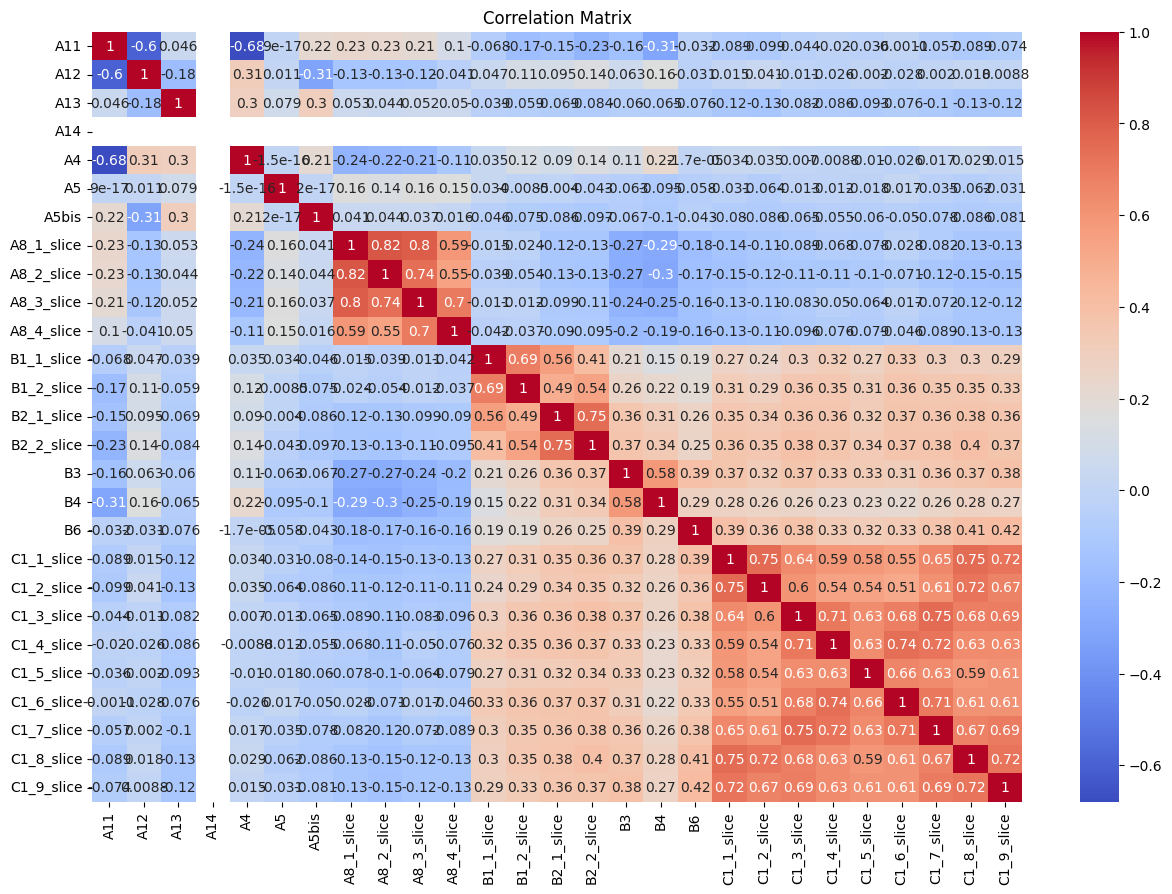

In [42]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(subset_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [43]:
# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data)

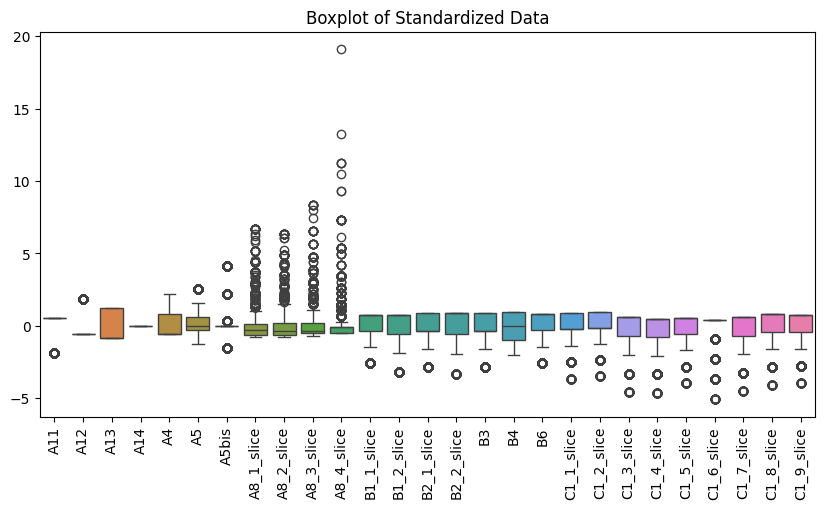

In [44]:
# Check if clustering is appropriate (variance and distribution)
plt.figure(figsize=(10, 5))
sns.boxplot(data=pd.DataFrame(scaled_data, columns=columns_of_interest))
plt.xticks(rotation=90)
plt.title("Boxplot of Standardized Data")
plt.show()

## Kmeans

In [56]:
results = {}

In [57]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

results['K-Means'] = evaluate_clustering(kmeans_labels, scaled_data)

## Hierarchical Clustering

In [58]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(scaled_data)

results['Agglomerative'] = evaluate_clustering(agglo_labels, scaled_data)

## DBSCAN

In [59]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

results['DBSCAN'] = evaluate_clustering(dbscan_labels, scaled_data)

## Gaussian Mixture Model

In [60]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

results['GMM'] = evaluate_clustering(gmm_labels, scaled_data)

## Spectral Clustering

In [61]:
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(scaled_data)

results['Spectral'] = evaluate_clustering(spectral_labels, scaled_data)

# Results

In [62]:
# Display results
print("Clustering Results (Silhouette, Davies-Bouldin, Calinski-Harabasz):")
for method, scores in results.items():
    print(f"{method}: {scores}")

Clustering Results (Silhouette, Davies-Bouldin, Calinski-Harabasz):
K-Means: (0.15269246852866936, 2.1011308992659, 942.6095444773118)
Agglomerative: (0.1589521819478433, 2.0576875225930715, 736.6008500311217)
DBSCAN: (-0.23000745307116527, 1.5647375305210922, 35.7856580788572)
GMM: (0.09415597947825827, 2.746383267725784, 323.629237057248)
Spectral: (-0.04554932790376446, 2.138864432972334, 259.29765827943044)


In [63]:
# Plotting the results
methods = list(results.keys())
silhouette_scores = [results[method][0] for method in methods]
davies_bouldin_scores = [results[method][1] for method in methods]
calinski_harabasz_scores = [results[method][2] for method in methods]

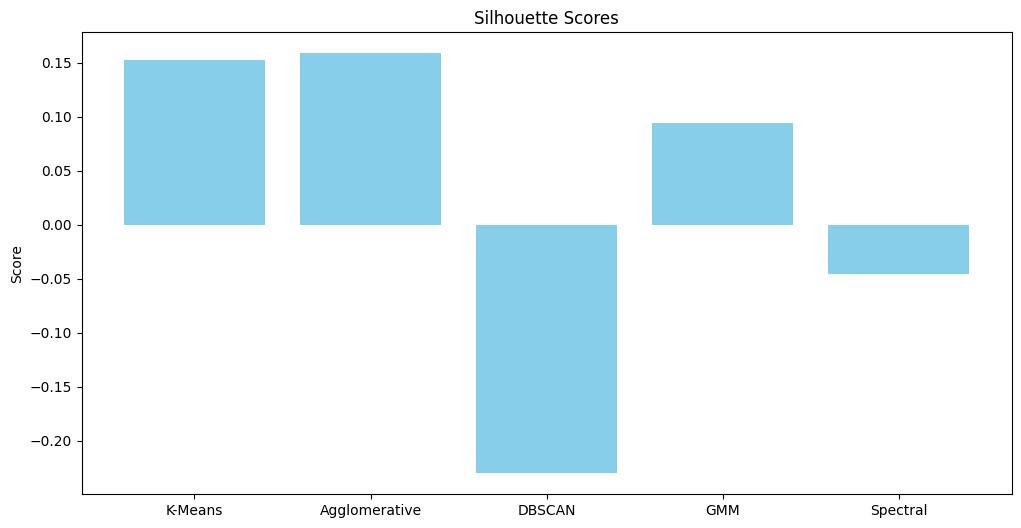

In [64]:
# Bar plot for silhouette scores
plt.figure(figsize=(12, 6))
plt.bar(methods, silhouette_scores, color='skyblue')
plt.title('Silhouette Scores')
plt.ylabel('Score')
plt.show()

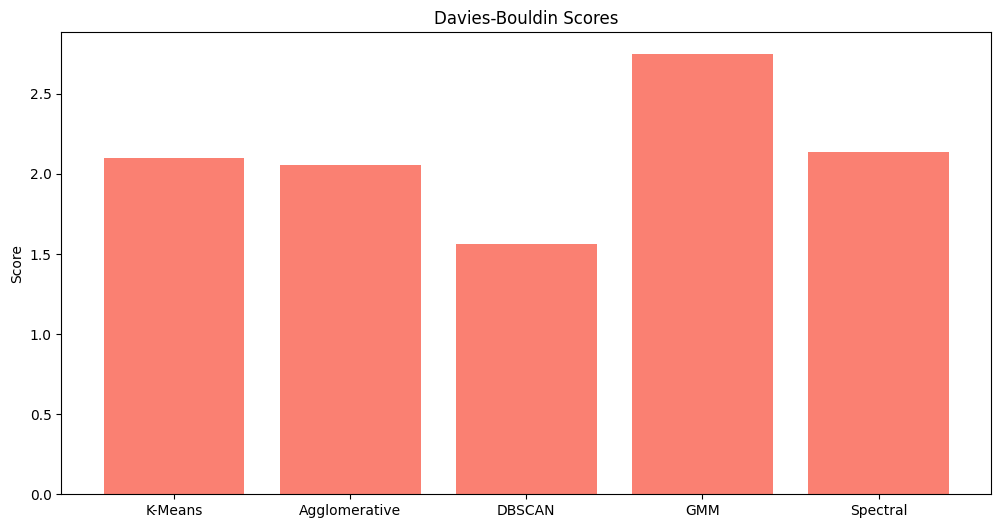

In [65]:
# Bar plot for Davies-Bouldin scores
plt.figure(figsize=(12, 6))
plt.bar(methods, davies_bouldin_scores, color='salmon')
plt.title('Davies-Bouldin Scores')
plt.ylabel('Score')
plt.show()

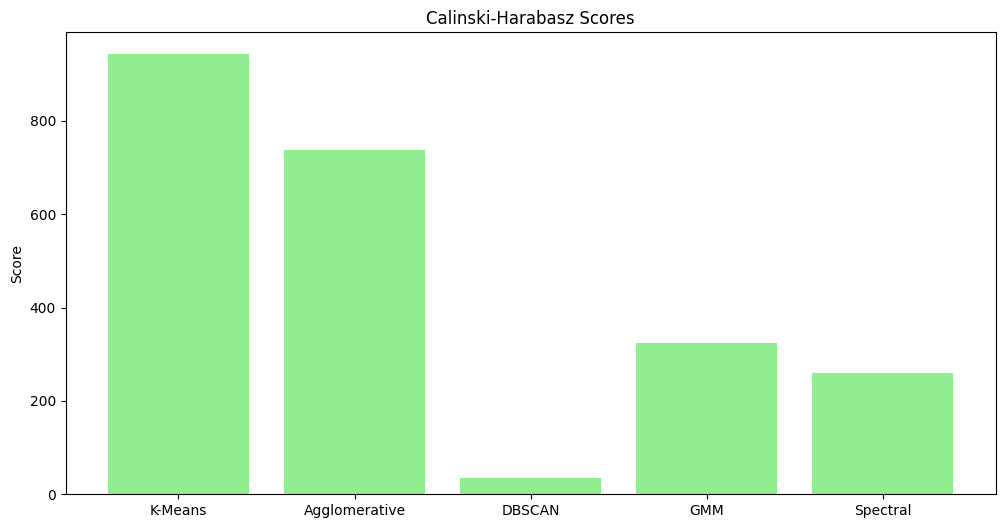

In [66]:
# Bar plot for Calinski-Harabasz scores
plt.figure(figsize=(12, 6))
plt.bar(methods, calinski_harabasz_scores, color='lightgreen')
plt.title('Calinski-Harabasz Scores')
plt.ylabel('Score')
plt.show()

In [67]:
analyze_results(results)

Analysis:
Best Silhouette Score: 0.1589521819478433 (Agglomerative)
Best Davies-Bouldin Score: 1.5647375305210922 (DBSCAN)
Best Calinski-Harabasz Score: 942.6095444773118 (K-Means)


# Improving Agglomerative Clustering

In [ ]:
pca = PCA(n_components=10, random_state=42)
reduced_data = pca.fit_transform(scaled_data)

In [103]:
def grid_search_agglomerative(data, n_clusters_range, linkage_options):
    results = {}
    
    for n_clusters in n_clusters_range:
        for linkage in linkage_options:
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            labels = model.fit_predict(data)
            
            silhouette = silhouette_score(data, labels)
            davies_bouldin = davies_bouldin_score(data, labels)
            calinski_harabasz = calinski_harabasz_score(data, labels)
            
            # Store results in the required format
            results[(n_clusters, linkage)] = {
                'silhouette': silhouette,
                'davies_bouldin': davies_bouldin,
                'calinski_harabasz': calinski_harabasz
            }
    
    return results

In [104]:
# Example usage with updated function
n_clusters_range = range(2, 11)  # Testing from 2 to 10 clusters
linkage_options = ['ward', 'complete', 'average']
results = grid_search_agglomerative(reduced_data, n_clusters_range, linkage_options)

In [105]:
# Display results
print("Spectral Clustering Results (Silhouette, Davies-Bouldin, Calinski-Harabasz):")
for method, scores in results.items():
    print(f"{method}: {scores}")

Spectral Clustering Results (Silhouette, Davies-Bouldin, Calinski-Harabasz):
(2, 'ward'): {'silhouette': 0.24882990755549025, 'davies_bouldin': 1.342384760950984, 'calinski_harabasz': 2114.7221817274553}
(2, 'complete'): {'silhouette': 0.2893502014310661, 'davies_bouldin': 1.2637476773590686, 'calinski_harabasz': 1566.127854184818}
(2, 'average'): {'silhouette': 0.41605173705425497, 'davies_bouldin': 0.9538341525984155, 'calinski_harabasz': 1018.6330641661866}
(3, 'ward'): {'silhouette': 0.18968316422458498, 'davies_bouldin': 1.552393636103582, 'calinski_harabasz': 1878.6672651198328}
(3, 'complete'): {'silhouette': 0.08120589364926568, 'davies_bouldin': 2.0242434382478276, 'calinski_harabasz': 1115.8629664920743}
(3, 'average'): {'silhouette': 0.40180703034134413, 'davies_bouldin': 0.9131336469400528, 'calinski_harabasz': 513.9731568834453}
(4, 'ward'): {'silhouette': 0.16846979413957383, 'davies_bouldin': 1.662185168724728, 'calinski_harabasz': 1446.6001804370949}
(4, 'complete'): {'

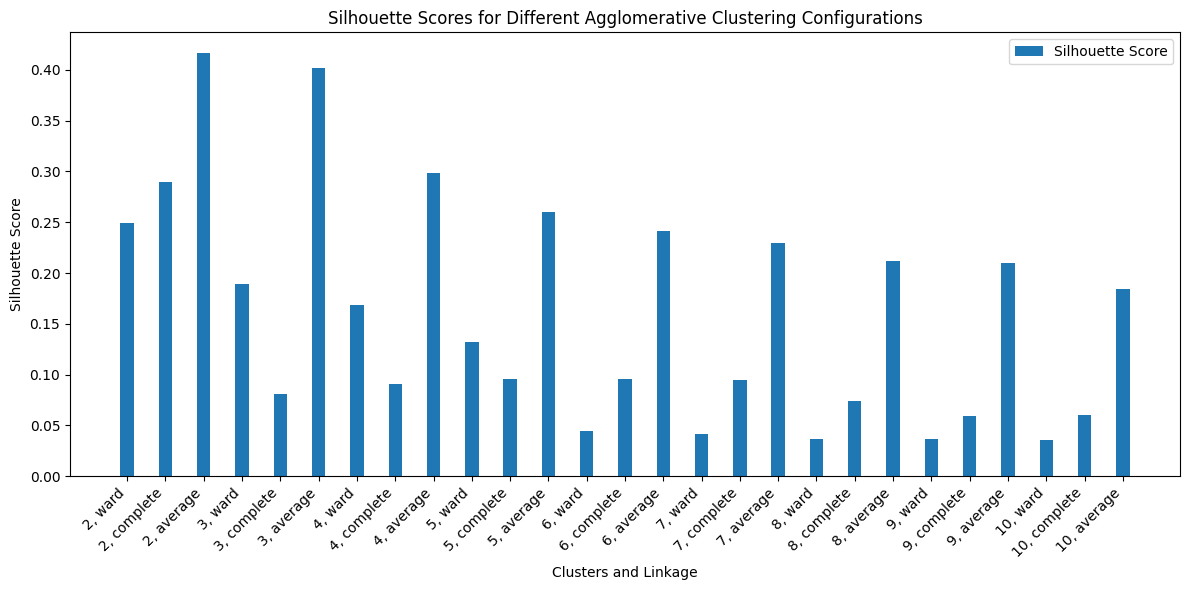

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
params_list = list(results.keys())
silhouette_scores = [score['silhouette'] for score in results.values()]

# Extract number of clusters and linkage methods for x-axis labels
x_labels = [f"{n_clusters}, {linkage}" for n_clusters, linkage in params_list]

# Create a bar graph
x = np.arange(len(x_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(x, silhouette_scores, width, label='Silhouette Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Clusters and Linkage')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Scores for Different Agglomerative Clustering Configurations')
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


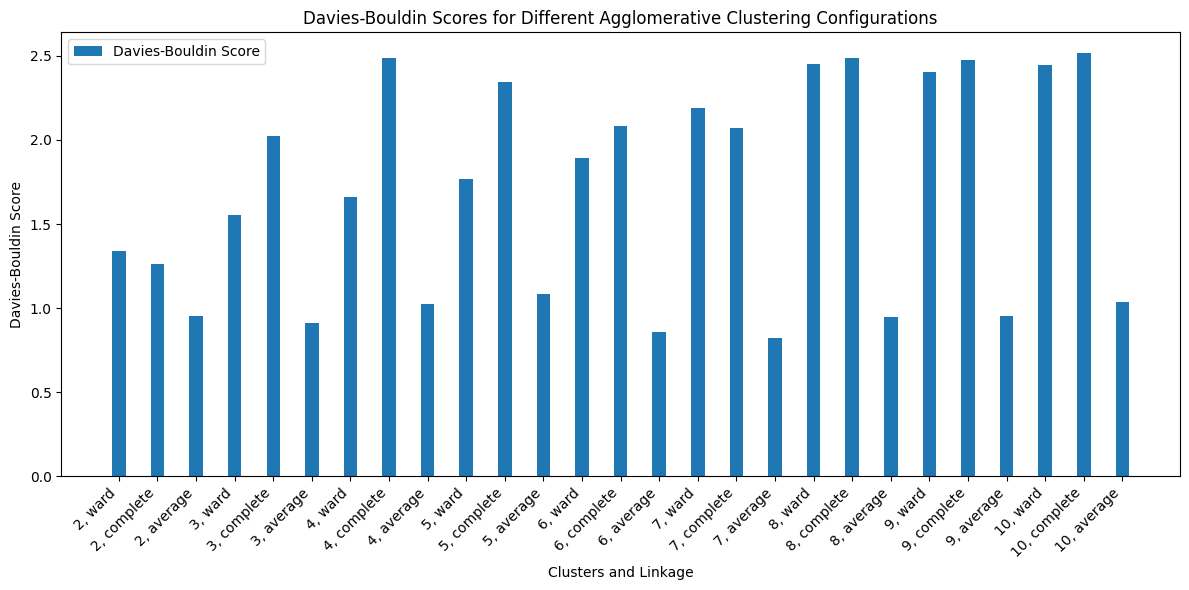

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
params_list = list(results.keys())
davies_bouldin_scores = [score['davies_bouldin'] for score in results.values()]

# Extract number of clusters and linkage methods for x-axis labels
x_labels = [f"{n_clusters}, {linkage}" for n_clusters, linkage in params_list]

# Create a bar graph
x = np.arange(len(x_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(x, davies_bouldin_scores, width, label='Davies-Bouldin Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Clusters and Linkage')
ax.set_ylabel('Davies-Bouldin Score')
ax.set_title('Davies-Bouldin Scores for Different Agglomerative Clustering Configurations')
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


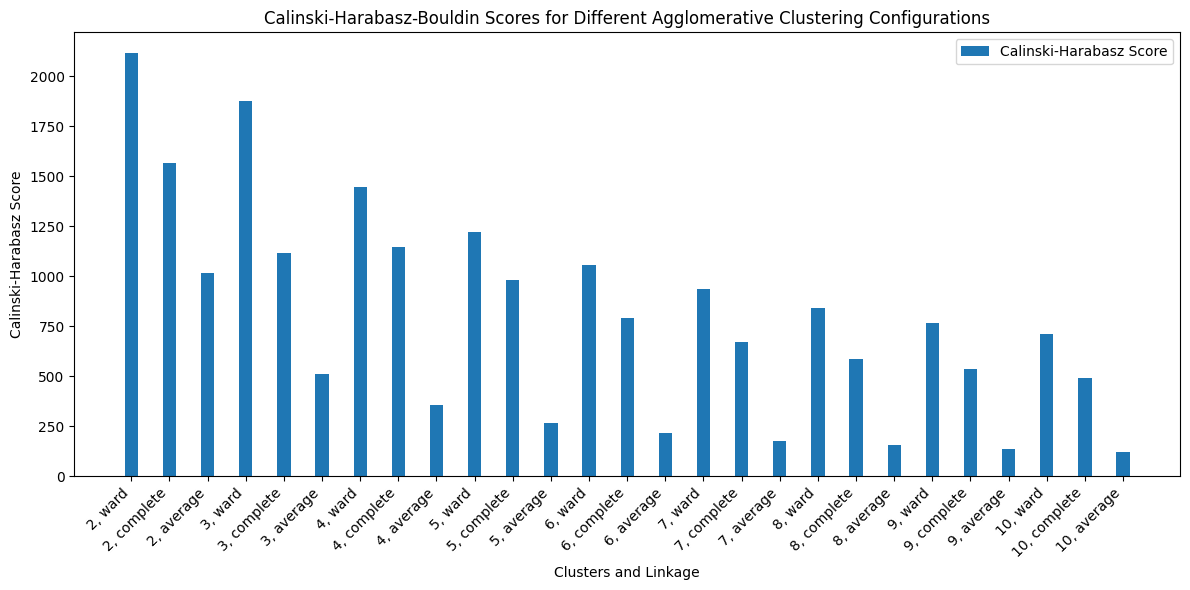

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
params_list = list(results.keys())
calinski_harabasz_scores = [score['calinski_harabasz'] for score in results.values()]

# Extract number of clusters and linkage methods for x-axis labels
x_labels = [f"{n_clusters}, {linkage}" for n_clusters, linkage in params_list]

# Create a bar graph
x = np.arange(len(x_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(x, calinski_harabasz_scores, width, label='Calinski-Harabasz Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Clusters and Linkage')
ax.set_ylabel('Calinski-Harabasz Score')
ax.set_title('Calinski-Harabasz-Bouldin Scores for Different Agglomerative Clustering Configurations')
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [113]:
methods = list(results.keys())
methods = [f"{n_clusters}, {linkage}" for n_clusters, linkage in methods]

def analyze_results(results):
    print("Analysis:")
    best_silhouette = max(silhouette_scores)
    best_davies_bouldin = min(davies_bouldin_scores)
    best_calinski_harabasz = max(calinski_harabasz_scores)

    print(f"Best Silhouette Score: {best_silhouette} ({methods[silhouette_scores.index(best_silhouette)]})")
    print(f"Best Davies-Bouldin Score: {best_davies_bouldin} ({methods[davies_bouldin_scores.index(best_davies_bouldin)]})")
    print(f"Best Calinski-Harabasz Score: {best_calinski_harabasz} ({methods[calinski_harabasz_scores.index(best_calinski_harabasz)]})")

analyze_results(results)

Analysis:
Best Silhouette Score: 0.41605173705425497 (2, average)
Best Davies-Bouldin Score: 0.8225244922445741 (7, average)
Best Calinski-Harabasz Score: 2114.7221817274553 (2, ward)
